# Visualisation of Indicators
This script showcases the utilisation of the different indicators. It is meant to help with understanding and interpreting the final rating and results.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import packages
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import indicators as ind
from data.data_preparation import import_data

C:\APPS\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\APPS\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\APPS\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times'], 'size':12})
rc('text', usetex=True)
import sys 
sys.path.append("C:/APPS/MiKTeX/21.7/fonts/source/public/rsfs")

In [4]:
# import input data from simulated network
dt = import_data()

In [5]:
# Number of scenarios
nr_scenarios = 4
scenarios = [i+1 for i in range(nr_scenarios)]
scenario_names = {idx: f"Scenario {idx}" for idx in scenarios}
# Number of alternatives
nr_alternatives = 4
alternatives = [i+1 for i in range(nr_alternatives)]
alternative_names = {1: "Volumetric Tariff", 2: "Monthly Power Peak", 3: "Yearly Power Peak", 4: "Capacity Tariff"}
# Number of criteria
nr_criteria = 5
# Customer Groups
consumers = ["Inflexible", "PV Owners", "EV Owners", "PV plus Battery", "EV, PV, Battery"]

In [6]:
tmp = sns.color_palette("Paired")
colors = [tmp[1], tmp[6], tmp[5], "k"]

## Efficient Grid

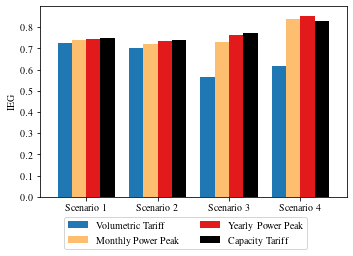

In [7]:
# Reduction of usage-related costs - using "Simultaneous Peak"
indicator_name = "IEG"
indicator_df = pd.DataFrame(columns=alternatives)
for scenario in scenarios:
    indicator_df.loc[scenario] = ind.get_efficient_grid(dt, scenario, nr_alternatives).loc[0]
ax = indicator_df.rename(index=scenario_names, columns=alternative_names).plot.bar(
    color=colors, width=0.8, figsize=(5.5, 3.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel(indicator_name)
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-0.3))

### Peak Reduction 
* Why does capacity tariff perform better in scenario 4?
* Is "Simultaneous Peak" or "Local Peak" the right thing? --> Probably none of both. I would need the other indicator.

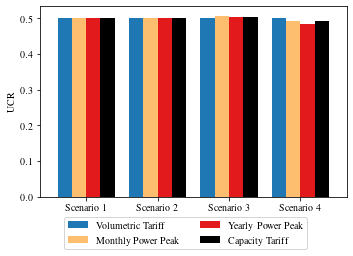

In [8]:
# Reduction of usage-related costs - using "Simultaneous Peak"
indicator = "UCR"
peak_reduction = pd.DataFrame(columns=alternatives)
for scenario in scenarios:
    peak_reduction.loc[scenario] = ind.get_reduction_of_usage_related_costs(dt, scenario, nr_alternatives).loc[0]
ax = peak_reduction.rename(index=scenario_names, columns=alternative_names).plot.bar(color=colors, width=0.8, figsize=(5.5, 3.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel(indicator)
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-0.3))

### Losses Reduction

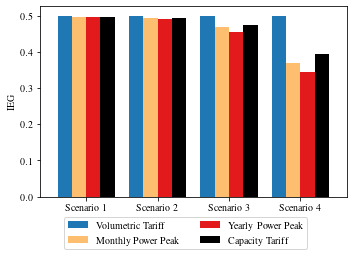

In [9]:
indicator = "Loss Reduction"
indicator_df = pd.DataFrame(columns=alternatives)
for scenario in scenarios:
    indicator_df.loc[scenario] = ind.get_relative_reduction(dt, scenario, nr_alternatives, 'Losses').loc[0]
ax = indicator_df.rename(index=scenario_names, columns=alternative_names).plot.bar(
    color=colors, width=0.8, figsize=(5.5, 3.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel(indicator_name)
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-0.3))

### Capacity Reduction
* Capacity tariff "looses" potential because of steps, but higher accuracy

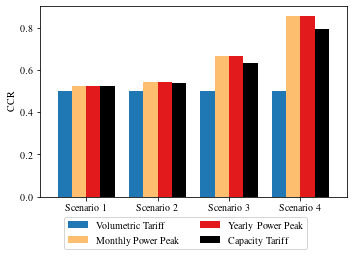

In [10]:
# Reduction of usage-related costs - using "Simultaneous Peak"
indicator_name = "CCR"
indicator_df = pd.DataFrame(columns=alternatives)
for scenario in scenarios:
    indicator_df.loc[scenario] = ind.get_reduction_of_capacity_related_costs(dt, scenario, nr_alternatives).loc[0]
ax = indicator_df.rename(index=scenario_names, columns=alternative_names).plot.bar(
    color=colors, width=0.8, figsize=(5.5, 3.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel(indicator_name)
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-0.3))

### Cost-Reflection

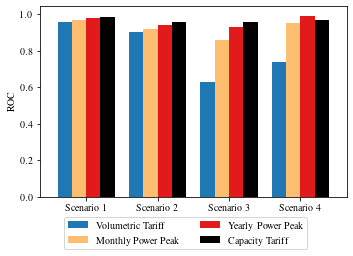

In [11]:
# Reduction of usage-related costs - using "Simultaneous Peak"
indicator_name = "ROC"
indicator_df = pd.DataFrame(columns=alternatives)
for scenario in scenarios:
    indicator_df.loc[scenario] = ind.get_reflection_of_costs(dt, scenario, nr_alternatives).loc[0]
ax = indicator_df.rename(index=scenario_names, columns=alternative_names).plot.bar(
    color=colors, width=0.8, figsize=(5.5, 3.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel(indicator_name)
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-0.3))

In [12]:
# check data inside function
# calculate division into usage- and capacity-related costs
cost_contribution_ur = pd.read_csv("data/cost_contribution_ur.csv", index_col=0,
                                   dtype={0: int})
cost_contribution_ur.columns = cost_contribution_ur.columns.astype(int)
cost_contribution_cr = 1 - cost_contribution_ur
cost_contribution_ur.rename(index=scenario_names, columns=alternative_names)

,Volumetric Tariff,Monthly Power Peak,Yearly Power Peak,Capacity Tariff
Scenario 1,0.410000,0.415912,0.416099,0.415339
Scenario 2,0.374425,0.384499,0.384762,0.383723
Scenario 3,0.338631,0.378345,0.379646,0.370812
Scenario 4,0.269127,0.366013,0.368076,0.343975


In [13]:
# check data inside function
# calculate division into usage- and capacity-related costs
cost_contribution_ur = pd.read_csv("data/cost_contribution_ur.csv", index_col=0,
                                   dtype={0: int})
cost_contribution_ur.columns = cost_contribution_ur.columns.astype(int)
cost_contribution_cr = 1 - cost_contribution_ur
cost_contribution_ur.rename(index=scenario_names, columns=alternative_names)

,Volumetric Tariff,Monthly Power Peak,Yearly Power Peak,Capacity Tariff
Scenario 1,0.410000,0.415912,0.416099,0.415339
Scenario 2,0.374425,0.384499,0.384762,0.383723
Scenario 3,0.338631,0.378345,0.379646,0.370812
Scenario 4,0.269127,0.366013,0.368076,0.343975


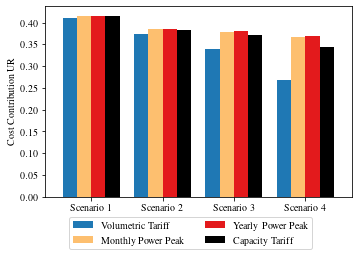

In [14]:
indicator_name = "Cost Contribution UR"
ax=cost_contribution_ur.rename(index=scenario_names, columns=alternative_names).plot.bar(
    color=colors, width=0.8, figsize=(5.5, 3.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel(indicator_name)
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-0.3))

In [15]:
# check data inside function 
# calculate division into usage- and capacity-related costs (using losses)
cost_contribution_ur = pd.read_csv("data/cost_contribution_ur.csv", index_col=0,
                                   dtype={0: int})
cost_contribution_ur.columns = cost_contribution_ur.columns.astype(int)
cost_contribution_cr = 1 - cost_contribution_ur
cost_contribution_ur.rename(index=scenario_names, columns=alternative_names)

,Volumetric Tariff,Monthly Power Peak,Yearly Power Peak,Capacity Tariff
Scenario 1,0.410000,0.415912,0.416099,0.415339
Scenario 2,0.374425,0.384499,0.384762,0.383723
Scenario 3,0.338631,0.378345,0.379646,0.370812
Scenario 4,0.269127,0.366013,0.368076,0.343975


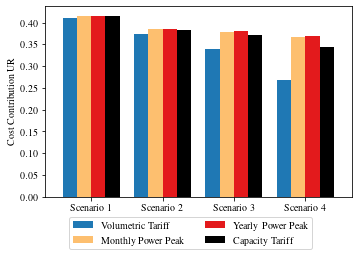

In [16]:
indicator_name = "Cost Contribution UR"
ax=cost_contribution_ur.rename(index=scenario_names, columns=alternative_names).plot.bar(
    color=colors, width=0.8, figsize=(5.5, 3.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel(indicator_name)
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-0.3))

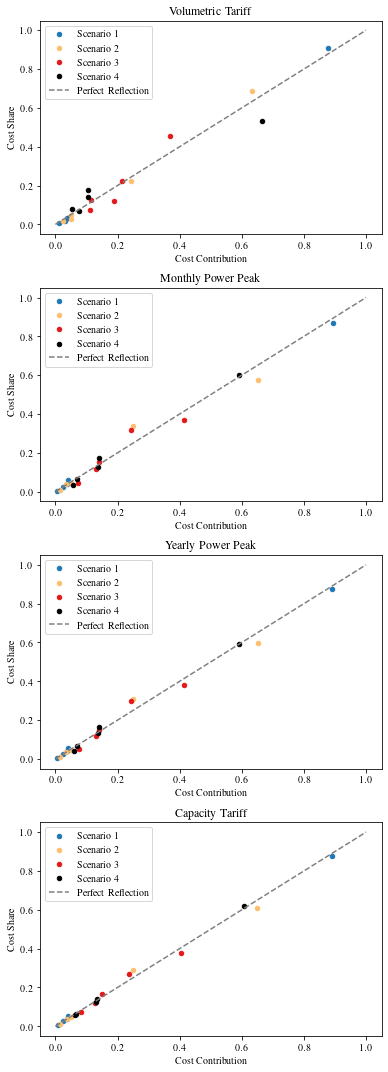

In [26]:
fig, axes = plt.subplots(4, figsize=(5.5, 15))
correlation = pd.DataFrame(columns=alternatives)
slope = pd.DataFrame(columns=alternatives)
for idx_scenario in scenarios:
    for alternative in range(1, nr_alternatives + 1):
        tmp = dt[(dt['Scenario'] == idx_scenario) & (dt['Alternative'] == alternative)]
        cost_share = tmp["Cost Share"].values/100
        peak_share = tmp['Peak Share'].values/100
        capacity_share = tmp['Capacity Share'].values/100
        # scale to costs, Eq. (8)
        peak_share_scaled = \
            cost_contribution_ur.loc[idx_scenario, alternative] * peak_share
        # scale to costs, Eq. (9)
        capacity_share_scaled = \
            cost_contribution_cr.loc[idx_scenario, alternative] * capacity_share
        # extract correlation, Eq.()
        correlation.loc[idx_scenario, alternative] = \
            np.corrcoef(cost_share, peak_share_scaled + capacity_share_scaled)[0, 1]
        # extract slope, Eq. () Todo: is a slope > 1 bad? Punishment too high then
        beta_1 = np.polyfit(cost_share, peak_share_scaled + capacity_share_scaled, 1)[0]
        slope.loc[idx_scenario, alternative] = 1 - abs(1-beta_1)
        # Plot scatters
        plot_df = pd.DataFrame()
        y = "Cost Share"
        x = "Cost Contribution"
        plot_df[y] = cost_share
        plot_df[x] = peak_share_scaled + capacity_share_scaled
        plot_df.plot.scatter(x=x, y=y, ax=axes[alternative-1], label=scenario_names[idx_scenario], 
                             color=colors[idx_scenario-1])
# add reference line with slope = 1
plot_df = pd.DataFrame()
plot_df["Perfect Reflection"] = [0, 1]
for alternative in range(1, nr_alternatives + 1):
    idx_ax = alternative - 1
    plot_df.plot(ax=axes[idx_ax], color="gray", linestyle="--")
    axes[idx_ax].set_title(alternative_names[alternative])
plt.tight_layout()

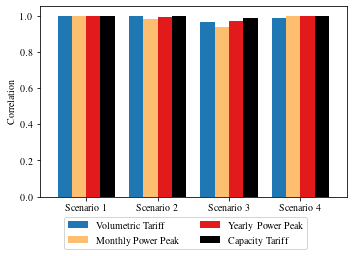

In [18]:
ax = correlation.rename(index=scenario_names, columns=alternative_names).plot.bar(
    color=colors, width=0.8, figsize=(5.5, 3.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel("Correlation")
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-0.3))

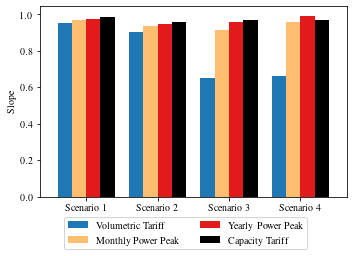

In [19]:
ax = slope.rename(index=scenario_names, columns=alternative_names).plot.bar(
    color=colors, width=0.8, figsize=(5.5, 3.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel("Slope")
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-0.3))

## Fairness and Customer Acceptance
* Value increases with increasing penetrations of DER --> might be better to scale with energy consumption
* They seem to pay less, should the criterion relate to their cost contribution rather than their group share?
* EV owners pay more in general

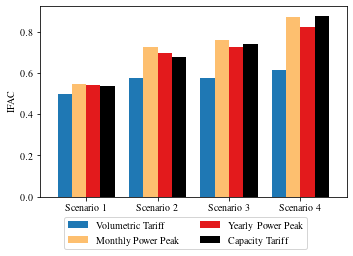

In [32]:
# Relative cost share inflexible users - using "Group Share"
indicator_name = "IFAC"
indicator_df = pd.DataFrame(columns=alternatives)
for scenario in scenarios:
    indicator_df.loc[scenario] = ind.get_fairness(dt, scenario, nr_alternatives).loc[0]
ax = indicator_df.rename(index=scenario_names, columns=alternative_names).plot.bar(
    color=colors, width=0.8, figsize=(5.5, 3.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel(indicator_name)
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-0.3))

In [33]:
indicator_df

,1,2,3,4
1,0.500000,0.545728,0.539677,0.535830
2,0.576840,0.728227,0.695446,0.676341
3,0.575685,0.758570,0.725463,0.739485
4,0.614950,0.869423,0.823386,0.878447


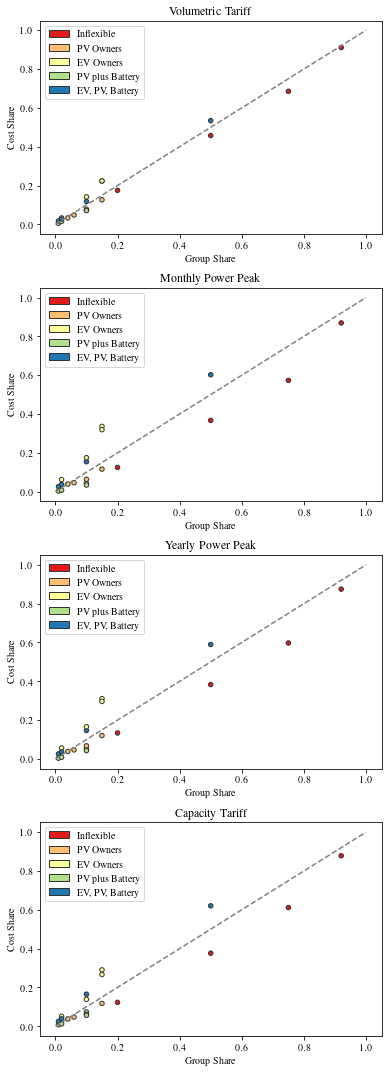

In [34]:
fig, axes = plt.subplots(4, figsize=(5.5, 15))
tmp = sns.color_palette("Paired")
colors_tmp = [tmp[5], tmp[6], tmp[10], tmp[2], tmp[1]]
for idx_scenario in scenarios:
    for alternative in range(1, nr_alternatives + 1):
        tmp = dt[(dt['Scenario'] == idx_scenario) & (dt['Alternative'] == alternative)]  
        plot_df = pd.DataFrame()
        x = "Group Share"
        y = "Cost Share"
        plot_df[x] = tmp[x]/100
        plot_df[y] = tmp[y]/100
        plot_df.plot.scatter(x=x, y=y, ax=axes[alternative-1], 
                             color=colors_tmp, edgecolor=".2", linewidth=1)
        axes[alternative-1].set_title(alternative_names[alternative])
# add reference line with slope = 1
plot_df = pd.DataFrame()
plot_df["Perfect Reflection"] = [0, 1]
for alternative in range(1, nr_alternatives + 1):
    idx_ax = alternative - 1
    plot_df.plot(ax=axes[idx_ax], color="gray", linestyle="--")
    axes[idx_ax].set_title(alternative_names[alternative])
    patches = [
        mpatches.Patch(facecolor=colors_tmp[i], label=consumers[i], edgecolor=".2", linewidth=1) for i in range(5)
    ]
    axes[idx_ax].legend(handles = patches)
plt.tight_layout()

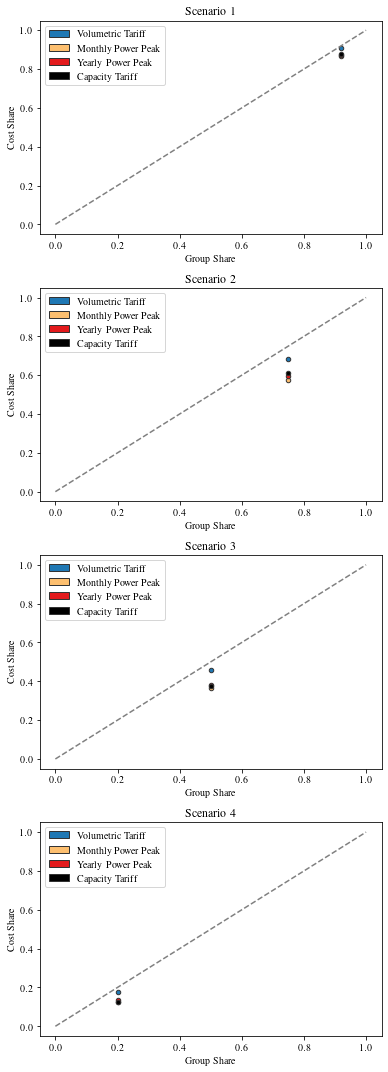

In [48]:
fig, axes = plt.subplots(4, figsize=(5.5, 15))
tmp = sns.color_palette("Paired")
colors_tmp = [tmp[5], tmp[6], tmp[10], tmp[2], tmp[1]]
for idx_scenario in scenarios:
    for alternative in range(1, nr_alternatives + 1):
        tmp = dt[(dt['Scenario'] == idx_scenario) & (dt['Alternative'] == alternative) & (dt['Customer Group'] == 1)]  
        plot_df = pd.DataFrame()
        x = "Group Share"
        y = "Cost Share"
        plot_df[x] = tmp[x]/100
        plot_df[y] = tmp[y]/100
        plot_df.plot.scatter(x=x, y=y, ax=axes[idx_scenario-1], 
                             color=colors[alternative-1], edgecolor=".2", linewidth=1)
        axes[idx_scenario-1].set_title(scenario_names[idx_scenario])
# add reference line with slope = 1
plot_df = pd.DataFrame()
plot_df["Perfect Reflection"] = [0, 1]
for alternative in range(1, nr_alternatives + 1):
    idx_ax = alternative - 1
    plot_df.plot(ax=axes[idx_ax], color="gray", linestyle="--")
    #axes[idx_ax].set_title(alternative_names[alternative])
    patches = [
        mpatches.Patch(facecolor=colors[i-1], label=alternative_names[i], edgecolor=".2", linewidth=1) for i in range(1, nr_alternatives + 1)
    ]
    axes[idx_ax].legend(handles = patches)
plt.tight_layout()

In [41]:
dt[(dt['Customer Group'] == 1)][["Scenario", "Alternative", "Relative Cost Share"]]

,Scenario,Alternative,Relative Cost Share
0,1,1,0.990030
5,1,2,0.944758
10,1,3,0.950748
15,1,4,0.954557
20,2,1,0.913956
25,2,2,0.764078
30,2,3,0.796533
35,2,4,0.815447
40,3,1,0.915100
45,3,2,0.734038


## Other Political Goals

### Expansion of DER


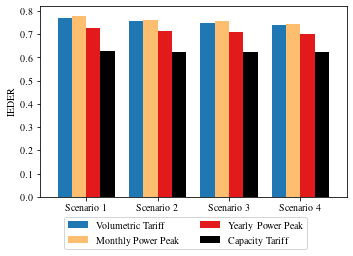

In [49]:
# Cost Change for PV owners in comparison to inflexible consumers
indicator_name = "IEDER"
indicator_df = pd.DataFrame(columns=alternatives)
for scenario in scenarios:
    indicator_df.loc[scenario] = ind.get_expansion_der(dt, scenario, nr_alternatives).loc[0]
ax = indicator_df.rename(index=scenario_names, columns=alternative_names).plot.bar(
    color=colors, width=0.8, figsize=(5.5, 3.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel(indicator_name)
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-0.3))

In [50]:
indicator_df.rename(index=scenario_names, columns=alternative_names)

,Volumetric Tariff,Monthly Power Peak,Yearly Power Peak,Capacity Tariff
Scenario 1,0.768011,0.780376,0.726230,0.628305
Scenario 2,0.755539,0.763193,0.715160,0.625355
Scenario 3,0.750040,0.755617,0.710279,0.624054
Scenario 4,0.741243,0.743495,0.702469,0.621973


#### Cost Change for PV Owners
* Why does this change with scenarios?
* Seems to be best for volumetric tariff
* Todo: Include other consumer groups as well? 

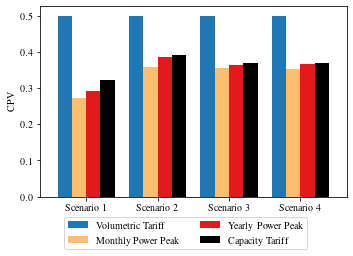

In [51]:
# get relative cost share, Eq. (18)
dt['Relative Cost Share'] = dt['Cost Share'] / dt['Group Share']
# Cost Change for PV owners in comparison to inflexible consumers
indicator_name = "CPV"
indicator_df = pd.DataFrame(columns=alternatives)
for scenario in scenarios:
    indicator_df.loc[scenario] = ind.get_cost_change_pv(dt, scenario, nr_alternatives).loc[0]
ax = indicator_df.rename(index=scenario_names, columns=alternative_names).plot.bar(
    color=colors, width=0.8, figsize=(5.5, 3.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel(indicator_name)
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-0.3))

In [52]:
relative_costs_base_df = pd.DataFrame()
for idx_scenario in scenarios:
    # Relative Cost Share of Customer Group 2 (Reference Value)
    dt_pv_owners_base = dt[(dt['Scenario'] == idx_scenario) &
                           (dt['Alternative'] == 1) & (dt['Customer Group'] == 2)]
    cost_share_pv_owner_base = dt_pv_owners_base['Relative Cost Share'].values[0]
    df_inflex_base = dt[(dt['Scenario'] == idx_scenario) &
                        (dt['Alternative'] == 1) & (dt['Customer Group'] == 1)]
    cost_share_inflex_base = df_inflex_base['Relative Cost Share'].values[0]
    relative_costs_base = cost_share_pv_owner_base/cost_share_inflex_base
    relative_costs_base_df.loc[0, idx_scenario] = relative_costs_base
relative_costs_base_df

,1,2,3,4
0,0.837383,0.877103,0.922226,0.888451


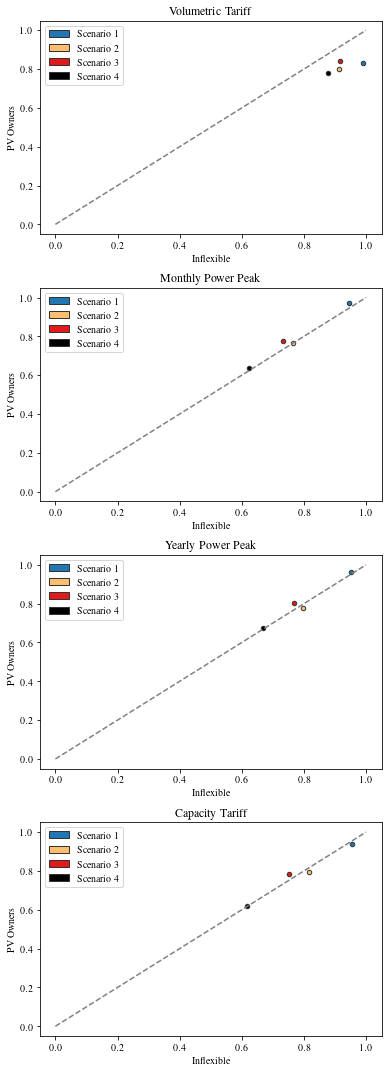

In [53]:
fig, axes = plt.subplots(4, figsize=(5.5, 15))
tmp = sns.color_palette("Paired")
colors_tmp = [tmp[5], tmp[6], tmp[10], tmp[2], tmp[1]]
for idx_scenario in scenarios:
    for alternative in range(1, nr_alternatives + 1):
        tmp = dt[(dt['Scenario'] == idx_scenario) & (dt['Alternative'] == alternative)]  
        plot_df = pd.DataFrame(columns=["Inflexible", "PV Owners"])
        x = "Inflexible"
        y = "PV Owners"
        plot_df[x] = tmp.loc[tmp["Customer Group"]==1, 'Relative Cost Share']
        plot_df[y] = tmp.loc[tmp["Customer Group"]==2, 'Relative Cost Share'].values
        plot_df.plot.scatter(x=x, y=y, ax=axes[alternative-1], 
                             color=colors[idx_scenario-1], edgecolor=".2", linewidth=1)
        axes[alternative-1].set_title(alternative_names[alternative])
# add reference line with slope = 1
plot_df = pd.DataFrame()
plot_df["Perfect Reflection"] = [0, 1]
for alternative in range(1, nr_alternatives + 1):
    idx_ax = alternative - 1
    plot_df.plot(ax=axes[idx_ax], color="gray", linestyle="--")
    axes[idx_ax].set_title(alternative_names[alternative])
    patches = [
        mpatches.Patch(facecolor=colors[i-1], label=scenario_names[i], edgecolor=".2", linewidth=1) for i in scenarios
    ]
    axes[idx_ax].legend(handles = patches)
plt.tight_layout()

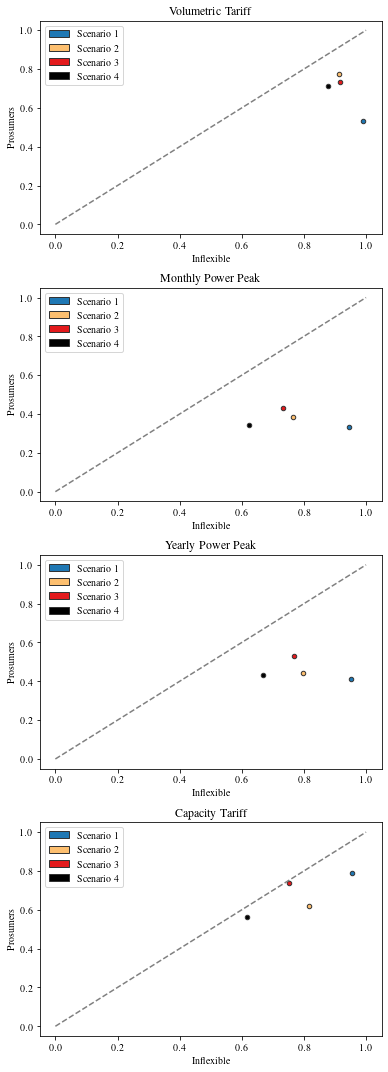

In [54]:
fig, axes = plt.subplots(4, figsize=(5.5, 15))
tmp = sns.color_palette("Paired")
colors_tmp = [tmp[5], tmp[6], tmp[10], tmp[2], tmp[1]]
for idx_scenario in scenarios:
    for alternative in range(1, nr_alternatives + 1):
        tmp = dt[(dt['Scenario'] == idx_scenario) & (dt['Alternative'] == alternative)]  
        plot_df = pd.DataFrame(columns=["Inflexible", "Prosumers"])
        x = "Inflexible"
        y = "Prosumers"
        plot_df[x] = tmp.loc[tmp["Customer Group"]==1, 'Relative Cost Share']
        plot_df[y] = tmp.loc[tmp["Customer Group"]==4, 'Relative Cost Share'].values
        plot_df.plot.scatter(x=x, y=y, ax=axes[alternative-1], 
                             color=colors[idx_scenario-1], edgecolor=".2", linewidth=1)
        axes[alternative-1].set_title(alternative_names[alternative])
# add reference line with slope = 1
plot_df = pd.DataFrame()
plot_df["Perfect Reflection"] = [0, 1]
for alternative in range(1, nr_alternatives + 1):
    idx_ax = alternative - 1
    plot_df.plot(ax=axes[idx_ax], color="gray", linestyle="--")
    axes[idx_ax].set_title(alternative_names[alternative])
    patches = [
        mpatches.Patch(facecolor=colors[i-1], label=scenario_names[i], edgecolor=".2", linewidth=1) for i in scenarios
    ]
    axes[idx_ax].legend(handles = patches)
plt.tight_layout()

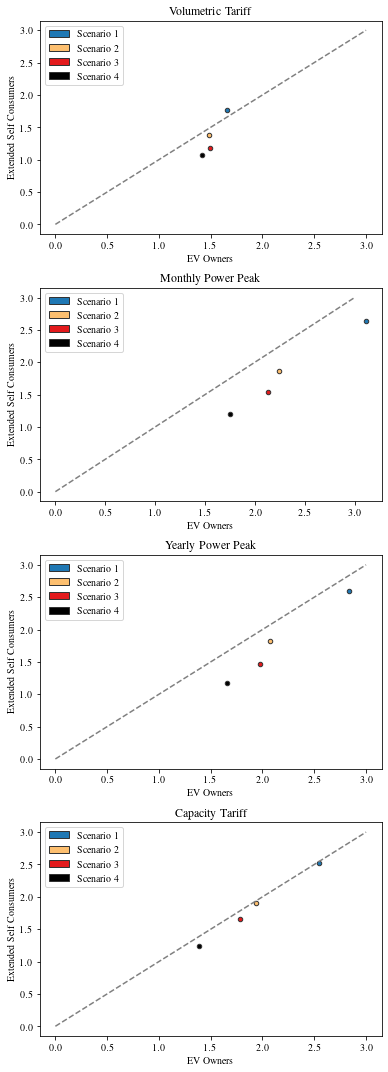

In [55]:
fig, axes = plt.subplots(4, figsize=(5.5, 15))
tmp = sns.color_palette("Paired")
colors_tmp = [tmp[5], tmp[6], tmp[10], tmp[2], tmp[1]]
for idx_scenario in scenarios:
    for alternative in range(1, nr_alternatives + 1):
        tmp = dt[(dt['Scenario'] == idx_scenario) & (dt['Alternative'] == alternative)]  
        consumer_group_names = ["EV Owners", "Extended Self Consumers"]
        plot_df = pd.DataFrame(columns=consumer_group_names)
        x = consumer_group_names[0]
        y = consumer_group_names[1]
        plot_df[x] = tmp.loc[tmp["Customer Group"]==3, 'Relative Cost Share']
        plot_df[y] = tmp.loc[tmp["Customer Group"]==5, 'Relative Cost Share'].values
        plot_df.plot.scatter(x=x, y=y, ax=axes[alternative-1], 
                             color=colors[idx_scenario-1], edgecolor=".2", linewidth=1)
        axes[alternative-1].set_title(alternative_names[alternative])
# add reference line with slope = 1
plot_df = pd.DataFrame()
plot_df["Perfect Reflection"] = [0, 1, 2, 3]
for alternative in range(1, nr_alternatives + 1):
    idx_ax = alternative - 1
    plot_df.plot(ax=axes[idx_ax], color="gray", linestyle="--")
    axes[idx_ax].set_title(alternative_names[alternative])
    patches = [
        mpatches.Patch(facecolor=colors[i-1], label=scenario_names[i], edgecolor=".2", linewidth=1) for i in scenarios
    ]
    axes[idx_ax].legend(handles = patches)
plt.tight_layout()

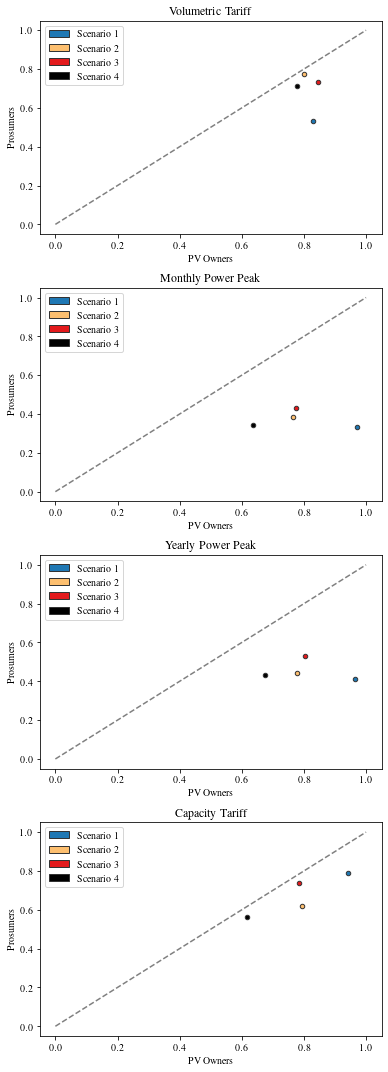

In [56]:
fig, axes = plt.subplots(4, figsize=(5.5, 15))
tmp = sns.color_palette("Paired")
colors_tmp = [tmp[5], tmp[6], tmp[10], tmp[2], tmp[1]]
for idx_scenario in scenarios:
    for alternative in range(1, nr_alternatives + 1):
        tmp = dt[(dt['Scenario'] == idx_scenario) & (dt['Alternative'] == alternative)]  
        consumer_group_names = ["PV Owners", "Prosumers"]
        plot_df = pd.DataFrame(columns=consumer_group_names)
        x = consumer_group_names[0]
        y = consumer_group_names[1]
        plot_df[x] = tmp.loc[tmp["Customer Group"]==2, 'Relative Cost Share']
        plot_df[y] = tmp.loc[tmp["Customer Group"]==4, 'Relative Cost Share'].values
        plot_df.plot.scatter(x=x, y=y, ax=axes[alternative-1], 
                             color=colors[idx_scenario-1], edgecolor=".2", linewidth=1)
        axes[alternative-1].set_title(alternative_names[alternative])
# add reference line with slope = 1
plot_df = pd.DataFrame()
plot_df["Perfect Reflection"] = [0, 1]
for alternative in range(1, nr_alternatives + 1):
    idx_ax = alternative - 1
    plot_df.plot(ax=axes[idx_ax], color="gray", linestyle="--")
    axes[idx_ax].set_title(alternative_names[alternative])
    patches = [
        mpatches.Patch(facecolor=colors[i-1], label=scenario_names[i], edgecolor=".2", linewidth=1) for i in scenarios
    ]
    axes[idx_ax].legend(handles = patches)
plt.tight_layout()

### Efficient Electricity Usage

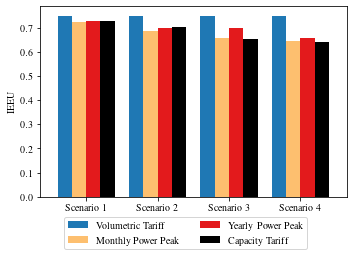

In [57]:
# Indicator for efficient electricity usage
indicator_name = "IEEU"
indicator_df = pd.DataFrame(columns=alternatives)
for scenario in scenarios:
    indicator_df.loc[scenario] = ind.get_efficient_electricity_usage(dt, scenario, nr_alternatives).loc[0]
ax = indicator_df.rename(index=scenario_names, columns=alternative_names).plot.bar(
    color=colors, width=0.8, figsize=(5.5, 3.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel(indicator_name)
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-0.3))

In [59]:
indicator_df.rename(index=scenario_names, columns=alternative_names)

,Volumetric Tariff,Monthly Power Peak,Yearly Power Peak,Capacity Tariff
Scenario 1,0.75,0.721540,0.725351,0.727559
Scenario 2,0.75,0.686311,0.697072,0.701393
Scenario 3,0.75,0.656469,0.698574,0.651921
Scenario 4,0.75,0.644128,0.657998,0.640895


#### Reduction in Purchased Electricity

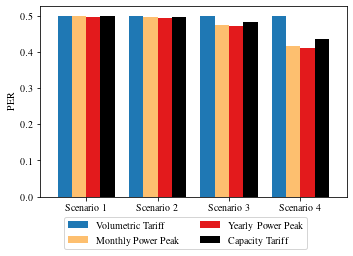

In [7]:
# Indicator for efficient electricity usage
indicator_name = "PER"
indicator_df = pd.DataFrame(columns=alternatives)
for scenario in scenarios:
    indicator_df.loc[scenario] = ind.get_reduction_of_purchased_electricity(dt, scenario, nr_alternatives).loc[0]
ax = indicator_df.rename(index=scenario_names, columns=alternative_names).plot.bar(
    color=colors, width=0.8, figsize=(5.5, 3.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel(indicator_name)
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-0.3))

#### Reflection of Electricity Usage in Costs

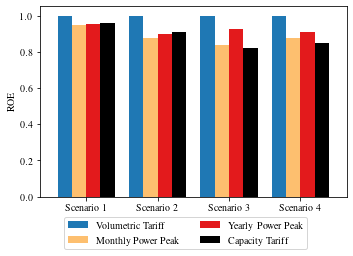

In [8]:
# Indicator for efficient electricity usage
indicator_name = "ROE"
indicator_df = pd.DataFrame(columns=alternatives)
for scenario in scenarios:
    indicator_df.loc[scenario] = ind.get_reflection_of_electricity(dt, scenario, nr_alternatives).loc[0]
ax = indicator_df.rename(index=scenario_names, columns=alternative_names).plot.bar(
    color=colors, width=0.8, figsize=(5.5, 3.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel(indicator_name)
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-0.3))

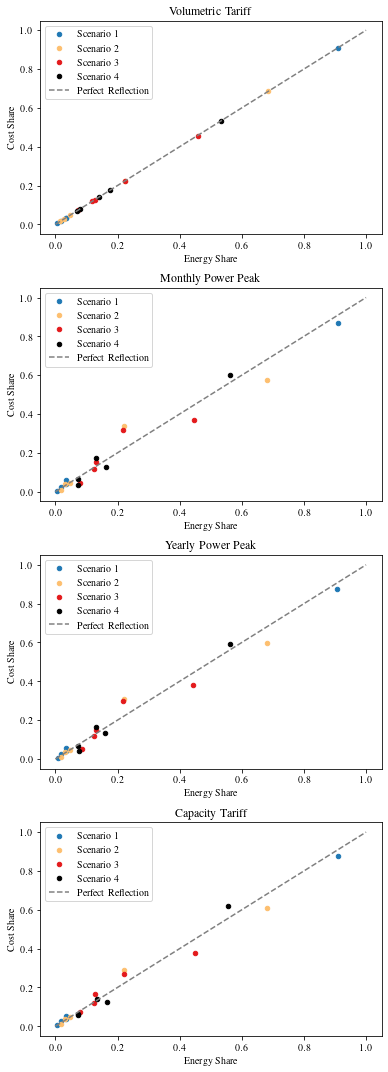

In [14]:
fig, axes = plt.subplots(4, figsize=(5.5, 15))
correlation = pd.DataFrame(columns=alternatives)
slope = pd.DataFrame(columns=alternatives)
for idx_scenario in scenarios:
    for alternative in range(1, nr_alternatives + 1):
        tmp = dt[(dt['Scenario'] == idx_scenario) & (dt['Alternative'] == alternative)]
        cost_share = tmp["Cost Share"].values/100
        energy_share = tmp['Energy Share'].values/100
        # extract correlation, Eq.()
        correlation.loc[idx_scenario, alternative] = \
            np.corrcoef(cost_share, energy_share)[0, 1]
        # extract slope, Eq. () Todo: is a slope > 1 bad? Punishment too high then
        beta_3 = np.polyfit(cost_share, energy_share, 1)[0]
        slope.loc[idx_scenario, alternative] = 1 - abs(1 - beta_3)
        # Plot scatters
        plot_df = pd.DataFrame()
        y = "Cost Share"
        x = "Energy Share"
        plot_df[y] = cost_share
        plot_df[x] = energy_share
        plot_df.plot.scatter(x=x, y=y, ax=axes[alternative-1], label=scenario_names[idx_scenario], 
                             color=colors[idx_scenario-1])
# add reference line with slope = 1
plot_df = pd.DataFrame()
plot_df["Perfect Reflection"] = [0, 1]
for alternative in range(1, nr_alternatives + 1):
    idx_ax = alternative - 1
    plot_df.plot(ax=axes[idx_ax], color="gray", linestyle="--")
    axes[idx_ax].set_title(alternative_names[alternative])
plt.tight_layout()

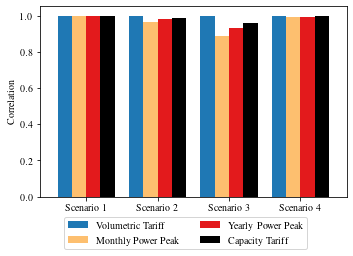

In [10]:
ax = correlation.rename(index=scenario_names, columns=alternative_names).plot.bar(
    color=colors, width=0.8, figsize=(5.5, 3.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel("Correlation")
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-0.3))

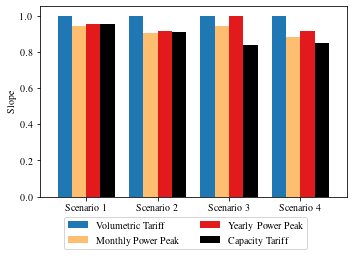

In [11]:
ax = slope.rename(index=scenario_names, columns=alternative_names).plot.bar(
    color=colors, width=0.8, figsize=(5.5, 3.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel("Slope")
plt.legend(ncols=2, loc="lower center", bbox_to_anchor=(0.475,-0.3))